<a href="https://colab.research.google.com/github/lisosoma/BI_STATISTICS/blob/main/bi_hw2_7_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import fmin
import seaborn as sns
from scipy.stats import studentized_range

### Задача 1.

Пусть объем выборки равен $200$, а размерность выборочного пространства $\mathbb{X}$ равен $50$. Смоделируем две выборки.

In [ ]:
m, n = 50, 500

In [ ]:
X = sts.multivariate_normal.rvs(mean = np.zeros(m), cov = np.diag(np.ones((m))), size = n)
y = sts.norm.rvs(loc = 0, scale = 1, size = n)

In [ ]:
len(y)

200

Для каждого признака из $\mathbb{X}$ проверим гипотезу о его некоррелированности с $y$. Для этого будем использовать тест Пирсона.

In [ ]:
r = np.array([sts.pearsonr(x, y)[0] for x in X.T])
pvalue = np.array([sts.pearsonr(x, y)[1] for x in X.T])

print(f'Для регрессоров с номерами {np.where(pvalue < alpha)[0]} гипотеза о некоррелированности с y была отклонена с уровнем значимости {alpha}')
print(f'Коэффициенты корреляции для этих признаков равны {r[np.where(pvalue < alpha)[0]]}')

Для регрессоров с номерами [38 40] гипотеза о некоррелированности с y была отклонена с уровнем значимости 0.05
Коэффициенты корреляции для этих признаков равны [-0.09802071  0.14836288]


In [ ]:
r

array([-0.01083478, -0.0060265 , -0.03793884,  0.0184551 ,  0.0572985 ,
        0.11081205, -0.06043043,  0.04505356,  0.16953681, -0.00158568,
        0.04240262,  0.14406347, -0.00209773,  0.14154592, -0.0090827 ,
        0.12721303, -0.05705717,  0.14103237, -0.02652431, -0.09712907,
        0.00860336,  0.0785175 ,  0.06065778,  0.04801632,  0.01389003,
       -0.12223695, -0.0202651 , -0.10412583, -0.06837483,  0.05341325,
       -0.06449749,  0.03947601,  0.05848323, -0.06571696,  0.05903176,
        0.0300518 , -0.06923567,  0.07117875, -0.07876873, -0.05430796,
       -0.05368703, -0.14582158,  0.09729788,  0.08368924, -0.10897243,
       -0.00069479, -0.10153801,  0.0458954 ,  0.02260059,  0.00113216])

Для проверки гипотезы о равенстве нулю вектора $\beta$ воспользуемся резульатами из ДЗ1 $(4.d)$.

In [ ]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
k, p = len(y) - len(X.T), len(X.T)
F = (sum((X @ beta - np.mean(y)) ** 2) / p) / (sum((X @ beta - y) ** 2) / k)
f = sts.f.ppf(q=1 - alpha, dfn=p, dfd=k, loc=0, scale=1)
print('Статистика критерия равна', F)
if (F < f):
    print(f'Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости {alpha}')
else:
    print(f'Есть основания отклонить H_0 в пользу H_1 с уровнем значимости {alpha}')
print('Значение p-value равно',  1 - sts.f.cdf(x=F, dfn=p, dfd=k, loc=0, scale=1))

Статистика критерия равна 1.2232553957348578
Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05
Значение p-value равно 0.14999299002176136


### Задача 2.

In [ ]:
n, alpha = 100, 0.05
samples = np.array([sts.norm.rvs(loc = 0, scale = 1, size = m) for i in range(n)])

- (a)

Статистика критерия $\sqrt{n}\displaystyle\frac{\bar x }{S} \sim t(n-1)$. 

In [ ]:
T = []

for sample in samples:
    T.append(np.mean(sample) / np.std(sample))

T = np.array(T)

#p-value для двустороннего доверительного интервала
pvalue = np.array([2 * min(1 - sts.t.cdf(x = t * np.sqrt(n), df = n - 1), sts.t.cdf(x = t * np.sqrt(n), df = n - 1)) for t in T])

# статистики критерия, которые выходят за левую границу доверительного интервала
Tl = np.where(T < sts.t.ppf(q = alpha/2, df = n - 1) / np.sqrt(n))[0]
# статистики критерия, которые выходят за правую границу доверительного интервала
Tu = np.where(T > sts.t.ppf(q = 1 - alpha/2, df = n - 1) / np.sqrt(n))[0]

print(f'С уровнем значимости {alpha} было отклонено {len(Tu) + len(Tl)} гипотез для выборок с номерами \n{Tu}, \n{Tl}')
print(f'p-value для этих выборок равны \n{pvalue[Tu]}, \n{pvalue[Tl]}')

С уровнем значимости 0.05 было отклонено 14 гипотез для выборок с номерами 
[ 0  5 36], 
[14 18 22 25 37 43 47 50 52 53 93]
p-value для этих выборок равны 
[0.00728783 0.00223918 0.00027051], 
[3.56772995e-02 3.17403195e-02 3.64183329e-04 2.01039471e-03
 3.39992407e-03 3.95996927e-02 1.66233255e-06 2.82633547e-02
 3.31655828e-02 1.35261259e-03 1.89964331e-04]


- (b)

Поправка Зидака.

In [ ]:
alphaZ = 1 - (1 - alpha) ** (1 / n)

# статистики критерия, которые выходят за левую границу доверительного интервала
TlZ = np.where(T < sts.t.ppf(q = alphaZ/2, df = n - 1) / np.sqrt(n))[0]
# статистики критерия, которые выходят за правую границу доверительного интервала
TuZ = np.where(T > sts.t.ppf(q = 1 - alphaZ/2, df = n - 1) / np.sqrt(n))[0]

print(f'С уровнем значимости {alphaZ} было отклонено {len(TuZ) + len(TlZ)} гипотез для выборок с номерами \n{TuZ}, \n{TlZ}')
print(f'p-value для этих выборок равны \n{pvalue[TuZ]}, \n{pvalue[TlZ]}')

С уровнем значимости 0.0005128014162623096 было отклонено 4 гипотез для выборок с номерами 
[36], 
[22 47 93]
p-value для этих выборок равны 
[0.00027051], 
[3.64183329e-04 1.66233255e-06 1.89964331e-04]


Поправка Бонферрони.

In [ ]:
alphaB = alpha / n

# статистики критерия, которые выходят за левую границу доверительного интервала
TlB = np.where(T < sts.t.ppf(q = alphaB/2, df = n - 1) / np.sqrt(n))[0]
# статистики критерия, которые выходят за правую границу доверительного интервала
TuB = np.where(T > sts.t.ppf(q = 1 - alphaB/2, df = n - 1) / np.sqrt(n))[0]

print(f'С уровнем значимости {alphaB} было отклонено {len(TuB) + len(TlB)} гипотез для выборок с номерами \n{TuB}, \n{TlB}')
print(f'p-value для этих выборок равны \n{pvalue[TuB]}, \n{pvalue[TlB]}')

С уровнем значимости 0.0005 было отклонено 4 гипотез для выборок с номерами 
[36], 
[22 47 93]
p-value для этих выборок равны 
[0.00027051], 
[3.64183329e-04 1.66233255e-06 1.89964331e-04]


- (c)

Проверка для пар выборок.

In [ ]:
from itertools import combinations
x = np.linspace(0, 100, 100, endpoint = False, dtype = int)
pairs = list(combinations(x, 2))

T, pvalue = [], []
for (i, j) in pairs:
    T.append(sts.ttest_ind(samples[i], samples[j], equal_var=False).statistic)
    pvalue.append(sts.ttest_ind(samples[i], samples[j], equal_var=False).pvalue)

T, pvalue = np.array(T), np.array(pvalue)

# статистики критерия, которые выходят за левую границу доверительного интервала
Tl = np.where(T < sts.t.ppf(q = alpha/2, df = 2 * (n - 1)))[0]
# статистики критерия, которые выходят за правую границу доверительного интервала
Tu = np.where(T > sts.t.ppf(q = 1 - alpha/2, df = 2 * (n - 1)))[0]

print(f'С уровнем значимости {alpha} было отклонено {len(Tu) + len(Tl)} гипотез для выборок с номерами \n{Tu}, \n{Tl}')

С уровнем значимости 0.05 было отклонено 339 гипотез для выборок с номерами 
[   0    5    7   13   14   17   21   24   26   32   36   41   42   46
   49   51   52   54   57   92   93   98  241  337  485  487  489  493
  494  497  501  504  506  512  514  516  521  522  526  529  531  532
  534  536  537  548  557  563  572  573  578  711  867  870  882  892
  898  938 1131 1156 1202 1551 1554 1566 1576 1582 1622 1712 1715 1727
 1737 1743 1783 1869 1872 1884 1894 1900 1940 2047 2100 2112 2122 2128
 2168 2259 2269 2275 2315 2402 2412 2418 2458 2472 2482 2488 2528 2551
 2619 2625 2665 2676 2686 2692 2732 2817 2934 2939 2940 2941 2942 2943
 2944 2945 2947 2948 2949 2950 2952 2954 2955 2958 2966 2967 2968 2972
 2974 2975 2977 2978 2981 2986 2990 2991 2996 3067 3127 3133 3173 3186
 3192 3232 3244 3250 3290 3412 3718 4040 4163 4202 4277 4313 4348 4382
 4478 4592 4618 4643 4690 4852 4865 4877 4888 4907 4922], 
[ 102  133  326  421  608  791  970 1231 1316 1340 1352 1376 1400 1483
 1646 1670 1

Поправка Бонферрони.

In [ ]:
alphaB = alpha / len(pairs)

# статистики критерия, которые выходят за левую границу доверительного интервала
TlB = np.where(T < sts.t.ppf(q = alphaB/2, df = 2 * (n - 1)))[0]
# статистики критерия, которые выходят за правую границу доверительного интервала
TuB = np.where(T > sts.t.ppf(q = 1 - alphaB/2, df = 2 * (n - 1)))[0]

print(f'С уровнем значимости {alphaB} было отклонено {len(TuB) + len(TlB)} гипотез')

С уровнем значимости 1.0101010101010101e-05 было отклонено 0 гипотез


- (d)

Тест Тьюки.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.DataFrame({'score': samples.ravel(),
                   'group': np.repeat(np.linspace(1, 100, 100, dtype = int), repeats=50)}) 

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=alpha)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.4199    0.9 -1.2717 0.4319  False
     1      3  -0.2661    0.9 -1.1179 0.5857  False
     1      4   -0.318    0.9 -1.1697 0.5338  False
     1      5  -0.3695    0.9 -1.2213 0.4822  False
     1      6  -0.0161    0.9 -0.8678 0.8357  False
     1      7  -0.4903    0.9  -1.342 0.3615  False
     1      8  -0.2185    0.9 -1.0703 0.6332  False
     1      9  -0.4285    0.9 -1.2803 0.4232  False
     1     10  -0.1798    0.9 -1.0316 0.6719  False
     1     11  -0.4212    0.9  -1.273 0.4305  False
     1     12  -0.3221    0.9 -1.1739 0.5296  False
     1     13  -0.2654    0.9 -1.1171 0.5864  False
     1     14   -0.381    0.9 -1.2328 0.4707  False
     1     15  -0.5182    0.9   -1.37 0.3335  False
     1     16    -0.46    0.9 -1.3118 0.3917  False
     1     17  -0.3768    0.9 -1.2286 0.4749  False
     1     1

Согласно тесту Тьюки отвергнуто $0$ гипотез.

### Задача 3.

Докажите, что при множественном тестировании с помощью алгоритма
Хольма-Бонферрони $FWER ≤ α$.

Согласно определению из лекции $20$ $FWER = P(число \ ложных \ отклонений \geq 1)$.

Пусть у нас есть $n$ гипотез, из них количество истинных нулевых гипотез равно $k$. И также есть отсортированные p-value $p_1, ..., p_n$. Пусть ошибочно отклонена первая из $k$ гипотез. Без потери общности пусть номер этой гипотезы равен $j$.
Тогда все гипотезы, имеющие номера $1, ..., j-1$ также отклоняются согласно алгоритму и по нашему предположению они являются ложными. Тогда $j - 1 \leq n - k$ и $\frac{1}{n - j +1} \leq \frac{1}{k}$.

По определению теста тогда $p_j \leq \frac{\alpha}{n - j +1}$. И из полученного ранее $p_j \leq \frac{\alpha}{n - j +1} \leq \frac{\alpha}{k}$, то есть $p_j \leq \frac{\alpha}{k}$. Пусть событие $A_j = \left\{p_j \leq \frac{\alpha}{k}\right\}$. Тогда вероятность объединения $\mathbb{P}(\cup A_j) \leq \sum \mathbb{P}(A_j)$. И даже если число тожных отклонений равно $k$, то вероятность этого события не больше, чем $\alpha$, поэтому получаем $FWER = P(число \ ложных \ отклонений \geq 1) \leq \alpha$.

### Задача 4.

In [ ]:
sample = sts.expon.rvs(loc = 7, size = 400)

(array([206., 112.,  45.,  21.,   8.,   2.,   1.,   3.,   1.,   1.]),
 array([ 7.00254837,  7.73875783,  8.47496729,  9.21117675,  9.94738621,
        10.68359567, 11.41980513, 12.15601459, 12.89222406, 13.62843352,
        14.36464298]),
 <BarContainer object of 10 artists>)

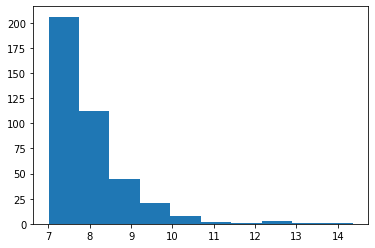

In [ ]:
plt.hist(sample)

Алгоритм Хольма-Бонферрони

In [ ]:
from tqdm import tqdm

def pcount():
    sample = sts.expon.rvs(loc = 7, size = 400)
    pvalues = []
    for k in range(395):
        subsample = sample[k:400]
        subsample.sort()
        Fn = np.zeros(400 - k)                         

        for i in range(400 - k):
            j = 0
            while((subsample[j] <= subsample[i]) and j < (399 - k)):
                Fn[i] += 1
                j += 1
            Fn[i] /= (400 - k)

        pvalues.append(sts.kstest(Fn, sts.expon.cdf(x = sample, loc = 6)).pvalue)
        
    return pvalues


def HB(pvalues):
    pvalues.sort()
    
    j = 0
    for i, p in enumerate(pvalues):
        if p < alpha / (395 - i):
            j += 1
        else:
            break

    return j

def B(pvalues):
    alphaB = alpha / 395
    
    j = 0
    for i, p in enumerate(pvalues):
        if p < alpha / alphaB:
            j += 1

    return j

In [ ]:
print(f'Было отклонено {HB(pcount())} гипотез')

395it [00:00, ?it/s]

Было отклонено 395 гипотез


Посчитаем среднее значение отклоненных гипотез

In [ ]:
hb = np.array([HB(pcount()) for i in tqdm(range(100))])

100%|██████████████████████| 100/100 [14:39<00:00,  8.79s/it]


In [ ]:
np.mean(hb)

395.0

С поправкой по Бонферрони

In [ ]:
b = np.array([B(pcount()) for i in tqdm(range(100))])

100%|██████████████████████| 100/100 [16:59<00:00, 10.20s/it]


In [ ]:
np.mean(b)

395.0